In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### as less missing values,I can directly drop these

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_into_daytime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_daytime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-12-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-12-25 05:50:00,2021-12-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-12-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-12-25 18:05:00,2021-12-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-12-25 16:50:00,2021-12-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
def extract_minute(df, col):
    df[col+'_minute'] = df[col].dt.minute
def drop_col(df, col):
    df.drop(col, axis=1, inplace=True)    

In [17]:
extract_hour(train_data, 'Dep_Time')
extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Dep_Time')
extract_minute(train_data, 'Arrival_Time')
drop_col(train_data, 'Dep_Time')
drop_col(train_data, 'Arrival_Time')

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [19]:
duration = list(train_data['Duration'])

In [22]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [24]:
train_data['Duration'] = duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [26]:
train_data.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,22,55,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,23,45,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,8,11,20,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,14,30,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,5,9,10,19,55,15


In [27]:
def hour(x):
    return int(x.split(' ')[0][0:-1])

def minute(x):
    return int(x.split(' ')[1][0:-1])

In [28]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,45


In [30]:
drop_col(train_data, 'Duration')

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [32]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'object']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [34]:
# Nominal data = Onehot
# Ordinal = label  

In [36]:
categorical = train_data[cat_col]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

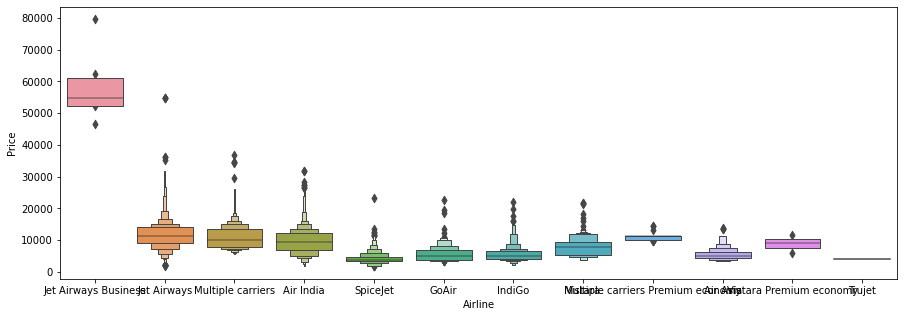

In [39]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Airline', y='Price', data=train_data.sort_values(by='Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

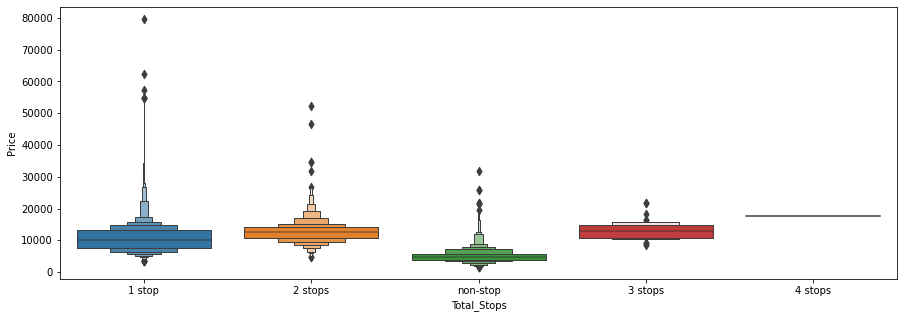

In [42]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Total_Stops', y='Price', data=train_data.sort_values(by='Price',ascending=False))

In [43]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [44]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

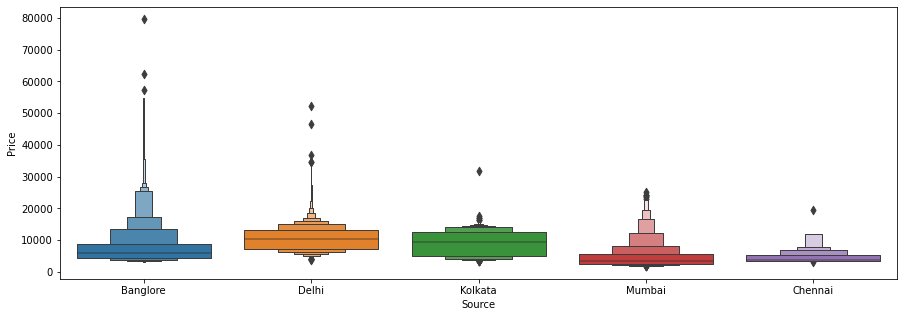

In [45]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Source', y='Price', data=train_data.sort_values(by='Price',ascending=False))

In [46]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [47]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

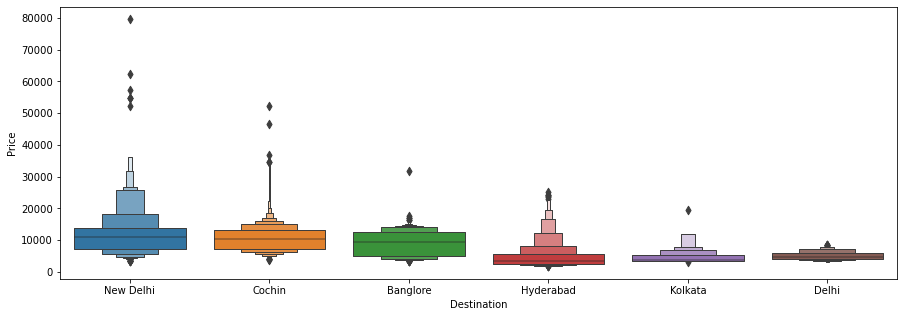

In [48]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Destination', y='Price', data=train_data.sort_values(by='Price',ascending=False))

In [49]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-53-4d2e7a50b43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-53-4d2e7a50b43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-53-4d2e7a50b43c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [54]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [55]:
drop_col(categorical, 'Route')

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [57]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [58]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [60]:
for i in categorical.columns:
    print('{} has a total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has a total 12 categories
Source has a total 5 categories
Destination has a total 6 categories
Total_Stops has a total 5 categories
Additional_Info has a total 10 categories
Route_1 has a total 5 categories
Route_2 has a total 45 categories
Route_3 has a total 30 categories
Route_4 has a total 14 categories
Route_5 has a total 6 categories


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [63]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [64]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-64-16ab1ba461c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [66]:
drop_col(categorical, 'Additional_Info')

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

<ipython-input-68-6da7ed69e8d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [70]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,21,50,35,4,45


In [71]:
drop_col(data_train, 'Airline')
drop_col(data_train, 'Source')
drop_col(data_train, 'Destination')

In [72]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,21,50,35,4,45


In [75]:
def plot(df, col):
    fig, (ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


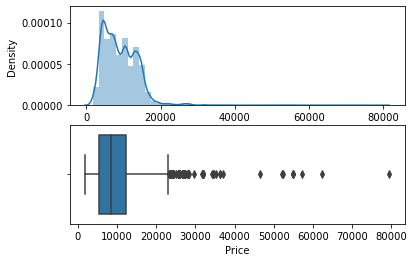

In [76]:
plot(data_train, 'Price')

In [77]:
data_train['Price'] = np.where(data_train['Price'] > 40000, data_train['Price'].median(), data_train['Price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


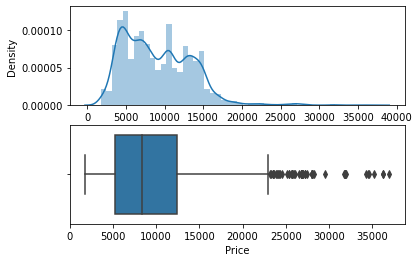

In [78]:
plot(data_train, 'Price')

In [79]:
X = data_train.drop('Price', axis=1)
Y = data_train['Price']

In [80]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,0,1,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,0,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,0,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,0,1,3,1,16,21,50,35,4,45


In [81]:
X.shape

(10682, 34)

In [82]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
mutual_info_classif(X, Y)

array([2.14663416e+00, 2.03479130e+00, 2.79321860e+00, 2.29115612e+00,
       1.49252723e+00, 7.28635924e-01, 7.52605577e-01, 1.07870765e-01,
       6.72302402e-01, 9.25157277e-01, 1.16139883e-04, 5.75343133e-01,
       1.88462990e-02, 3.16000751e-01, 0.00000000e+00, 2.35735818e-01,
       0.00000000e+00, 1.70654107e-01, 1.54405277e+00, 8.70795168e-01,
       2.87580762e-01, 1.55553790e+00, 4.00079496e-01, 3.00448359e-01,
       1.61765953e-01, 3.78323662e-01, 1.07422582e+00, 8.67427503e-01,
       1.43106681e+00, 1.84658365e+00, 1.19490332e+00, 1.51476383e+00,
       1.77500153e+00, 1.06894341e+00])

In [84]:
imp = pd.DataFrame(mutual_info_classif(X, Y), index=X.columns)
imp

,0
Total_Stops,2.150973
Route_1,2.037761
Route_2,2.763110
Route_3,2.290686
Route_4,1.464323
Route_5,0.695960
Air India,0.758813
GoAir,0.088245
IndiGo,0.667827
Jet Airways,0.911467


In [85]:
imp.columns = ['Importance']
imp.sort_values(by='Importance', ascending=False)

,Importance
Route_2,2.763110
Route_3,2.290686
Total_Stops,2.150973
Route_1,2.037761
Arrival_Time_hour,1.848236
Duration_hours,1.779225
Cochin,1.550621
Arrival_Time_minute,1.545806
Delhi,1.531042
Route_4,1.464323


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [88]:
from sklearn import metrics 

In [93]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print("Training score : {}".format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print("Prediction score :\n {}".format(y_prediction))
    print('\n')

    r2_scores = metrics.r2_score(y_test, y_prediction) 
    print("R2 score : {}".format(r2_scores))

    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_prediction))) 
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))

    sns.displot(y_test - y_prediction)

    if dump==1:
        file = open('S:\G Drive backup\Data Science\Machine Learning Projects\Flight price/model.pkl', 'wb')
        pickle.dump(model, file)

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
import pickle

Training score : 0.9507369970261391
Prediction score :
 [6993.88       5076.12216667 7703.37       ... 4513.591      2227.
 5732.90916667]


R2 score : 0.84999699504425
MAE : 1074.4425280531095
MSE : 2914340.014259156
RMSE : 1707.1438176847187


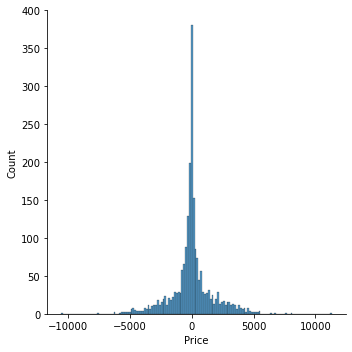

In [95]:
predict(RandomForestRegressor(),1)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.607311334508755
Prediction score :
 [5266.45179312 7471.0479207  7584.67510529 ... 3438.32028051 3011.87772117
 8400.07556872]


R2 score : 0.6489941697773095
MAE : 1886.5834080047982
MSE : 6819532.292423122
RMSE : 2611.4234226611206


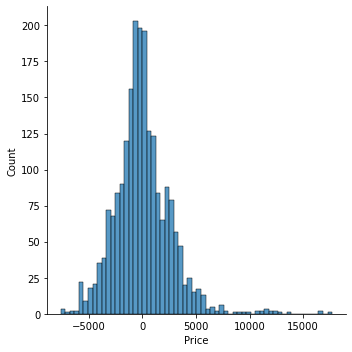

In [97]:
predict(LinearRegression(),0)

Training score : 0.9651612227539089
Prediction score :
 [6535. 5678. 8759. ... 4319. 2227. 4544.]


R2 score : 0.7493908699092533
MAE : 1231.065629386991
MSE : 4868970.564806973
RMSE : 2206.574395937507


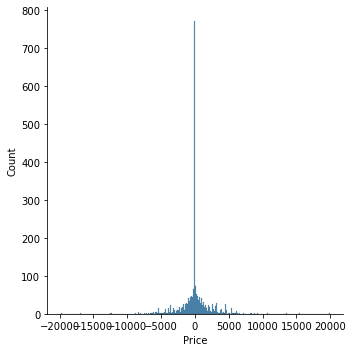

In [98]:
predict(DecisionTreeRegressor(),0)

Training score : 0.7745768282339668
Prediction score :
 [4348.6 4494.4 8776.4 ... 4758.4 2437.8 6699.2]


R2 score : 0.6882198921491933
MAE : 1636.8771174543754
MSE : 6057433.610931213
RMSE : 2461.1854076707045


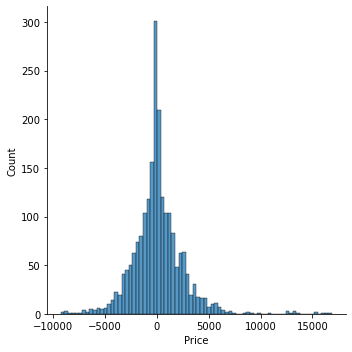

In [99]:
predict(KNeighborsRegressor(),0)

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
reg_rf = RandomForestRegressor()

In [102]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 6)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 4)]

In [103]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': max_depth,
    'min_samples_split': [5, 10, 15]
}

In [104]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15]}

In [107]:
rf_random = RandomizedSearchCV(reg_rf, random_grid, cv=3, n_jobs=-1, verbose=2)

In [108]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   verbose=2)

In [109]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [110]:
prediction = rf_random.predict(X_test)

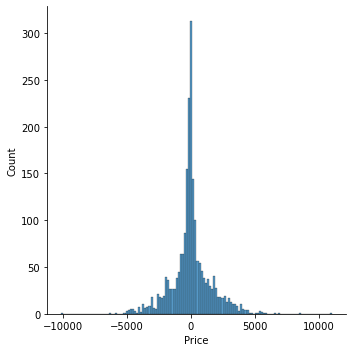

In [111]:
sns.displot(y_test - prediction)

In [112]:
metrics.r2_score(y_test, prediction)

0.8734909978281821

In [113]:
file = open('S:\G Drive backup\Data Science\Machine Learning Projects\Flight price/rf_random.pkl', 'wb')

In [114]:
pickle.dump(rf_random, file)

In [118]:
model = open('S:\G Drive backup\Data Science\Machine Learning Projects\Flight price/model.pkl', 'rb')
forest = pickle.load(model)

In [121]:
predictions2 = forest.predict(X_test)

In [122]:
metrics.r2_score(y_test, predictions2)

0.84999699504425